# O que é Série Temporal <a id ="1"></a>
Quaisquer dados registrados com algum intertesto fixo de tempo são chamados de dados de série temporal. Esse intervalo fixo pode ser horário, diário, mensal ou anual. por exemplo. leitura de temperatura horária, mudança diária de preços de combustível, conta mensal de eletricidade, anular relatório de lucro da empresa, etc. Em dados de séries temporais, o tempo sempre será uma variável independente e pode haver uma ou mais variáveis dependentes.


No exemplo acima, como há apenas uma variável dependente do tempo, ela é chamada de série temporal univariada. Se houver várias variáveis dependentes, ela será chamada de série temporal multivariada.

O objetivo da análise de séries temporais é entender como a mudança no tempo afeta as variáveis dependentes e, consequentemente, prever valores para intervalos de tempo futuros.


## Características da série temporal <a id ="2"></a>
Média, desvio padrão e sazonalidade definem diferentes características da série temporal.

![Time_Series_Characteristics](https://raw.githubusercontent.com/satishgunjal/images/master/Time_Series_Characteristics.png)

As características importantes da série temporal são as seguintes

### Tendência <a id ="3"></a>
A tendência representa a mudança nas variáveis dependentes em relação ao tempo do início ao fim. Em caso de tendência crescente, a variável dependente aumentará com o tempo e vice-versa. Não é necessário ter tendência definida nas séries temporais, podemos ter uma única série temporal com tendência crescente e decrescente. Em suma, a tendência representa a média variável dos dados da série temporal.

![Tendência](https://raw.githubusercontent.com/satishgunjal/images/master/Trend.png)

### Sazonalidade <a id ="4"></a>
Se as observações se repetirem após um intervalo de tempo fixo, elas serão referidas como observações sazonais. Essas mudanças sazonais nos dados podem ocorrer devido a eventos naturais ou eventos causados pelo homem. Por exemplo, todos os anos, as vendas de panos quentes aumentam pouco antes do inverno. Assim, a sazonalidade representa as variações dos dados em intervalos fixos.

![Sazonalidade](https://raw.githubusercontent.com/satishgunjal/images/master/Seasonality.png)

### Irregularidades <a id ="5"></a>
Isso também é chamado de ruído. Quedas e saltos estranhos nos dados são chamados de irregularidades. Essas flutuações são causadas por eventos incontroláveis, como terremotos, guerras, inundações, pandemias, etc. Por exemplo, devido à pandemia de COVID-19, há uma grande demanda por desinfetantes para as mãos e máscaras.

![Irregularidades](https://raw.githubusercontent.com/satishgunjal/images/master/Irregularities.png)

### Ciclicidade <a id ="6"></a>
A ciclicidade ocorre quando as observações na série se repetem em um padrão aleatório. Observe que, se houver algum padrão fixo, ele se tornará sazonalidade; no caso de ciclicidade, as observações podem se repetir após uma semana, meses ou após um ano. Esses tipos de padrões são muito mais difíceis de prever.

![Ciclicidade](https://raw.githubusercontent.com/satishgunjal/images/master/Cyclicity.png)

Os dados de séries temporais que possuem as características acima são chamados de 'Dados não estacionários'. Para qualquer análise de dados de séries temporais, devemos convertê-los em 'Dados Estacionários'

A diretriz geral é estimar a tendência e a sazonalidade na série temporal e, em seguida, tornar a série temporal estacionária para modelagem de dados. Na etapa de modelagem de dados, técnicas estatísticas são usadas para análise e previsão de séries temporais. Uma vez que temos as previsões, na etapa final, os valores previstos são convertidos na escala original, aplicando de volta as restrições de tendência e sazonalidade.

# Análise de Séries Temporais <a id ="7"></a>
Como o nome sugere, sua análise dos dados da série temporal para identificar os padrões nela. Explicarei brevemente as diferentes técnicas e testes para análise de dados de séries temporais.

## Decomposição de séries temporais <a id ="8"></a>
A decomposição da série temporal ajuda a desconstruir a série temporal em vários componentes, como tendência e sazonalidade, para melhor visualização de suas características. O uso da decomposição de séries temporais facilita a identificação rápida de uma mudança média ou variação nos dados

![Decomposition_of_Time_Series](https://raw.githubusercontent.com/satishgunjal/images/master/Decomposition_of_Time_Series.png)

## Dados Estacionários <a id ="9"></a>
Para uma análise e previsão precisas, a tendência e a sazonalidade são removidas da série temporal e convertidas em séries estacionárias.
Dados de séries temporais são ditos estacionários quando propriedades estatísticas como média, desvio padrão são constantes e não há sazonalidade. Em outras palavras, as propriedades estatísticas dos dados da série temporal não devem ser uma função do tempo.

![Estacionaridade](https://raw.githubusercontent.com/satishgunjal/images/master/Stationarity.png)

# Exemplo Python <a id ="29"></a>
Temos uma série temporal mensal de dados dos passageiros aéreos de 1º de janeiro de 1949 a 1º de dezembro de 1960. Cada linha contém o número de passageiros aéreos de um mês daquele ano específico. O objetivo é construir um modelo para prever o tráfego aéreo de passageiros para os próximos meses.

## Importar a biblioteca <a id ="30"></a>
* pandas: Usado para manipulação e análise de dados
* numpy : Numpy é a biblioteca principal para computação científica em Python. É usado para trabalhar com arrays e matrizes.
* matplotlib : É uma biblioteca de plotagem, e vamos usá-la para visualização de dados
* seaborn: É uma biblioteca de visualização de dados Python baseada em matplotlib. Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos
* statsmodels: usando classes e funções do módulo statsmodels para análise e previsão de séries temporais
    * adfuller: Dickey-Fuller aumentado
* rcParams: Para alterar as propriedades do matplotlib, como tamanho da figura

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller as adf

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("AirPassengers.csv", sep=",")
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Compreendendo os dados <a id ="31"></a>
* Existem duas colunas 'Mês' e 'Passageiros'. A coluna do mês contém o valor do mês naquele ano e a coluna do passageiro contém o número de passageiros aéreos naquele mês específico.
* Como você deve ter notado, o tipo de dados da coluna 'Month' é 'Object', então vamos convertê-lo para 'datetime'
* Para facilitar a plotagem, definimos o índice do dataframe do pandas 'df' para a coluna 'Month' para que ele atue como eixo x e a coluna Passengers como eixo y

In [3]:
df['Month'] = pd.to_datetime(df.Month)
df = df.set_index(df.Month)
df.drop('Month', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)
df

Column datatypes= 
 Passengers    int64
dtype: object


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## Característica da Série Temporal <a id ="32"></a>

### Tendência 

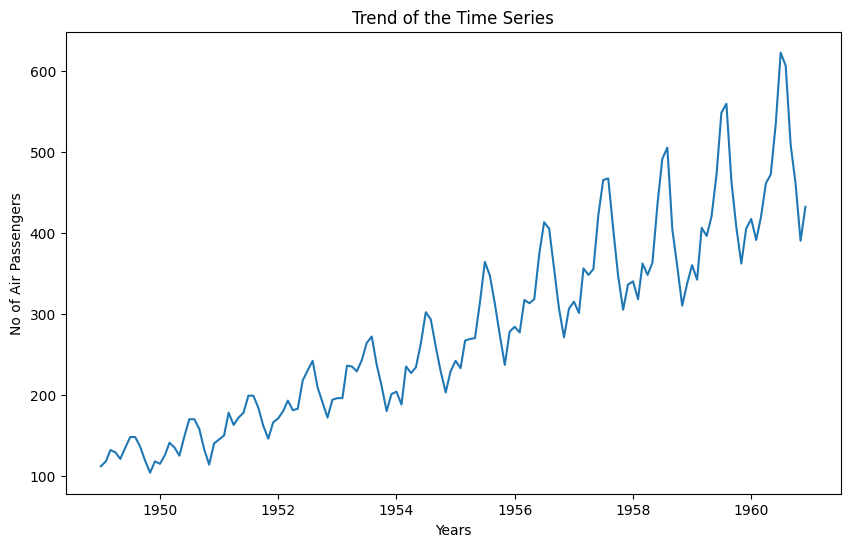

In [4]:
plt.figure(figsize= (10,6))
plt.plot(df)
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Trend of the Time Series')
plt.show()

Como você pode ver no gráfico acima, há uma tendência de aumento do número de passageiros a cada ano.

### Variação
No gráfico acima você pode ver claramente que a variação também está aumentando com o nível da série. Você verá na parte posterior deste exercício como lidamos com a variância para aumentar a estacionariedade da série.

### Sazonalidade
Também podemos ver o gráfico subindo e descendo em intervalos regulares, esse é o sinal de sazonalidade. Vamos plotar o gráfico por alguns meses para visualizar a sazonalidade.

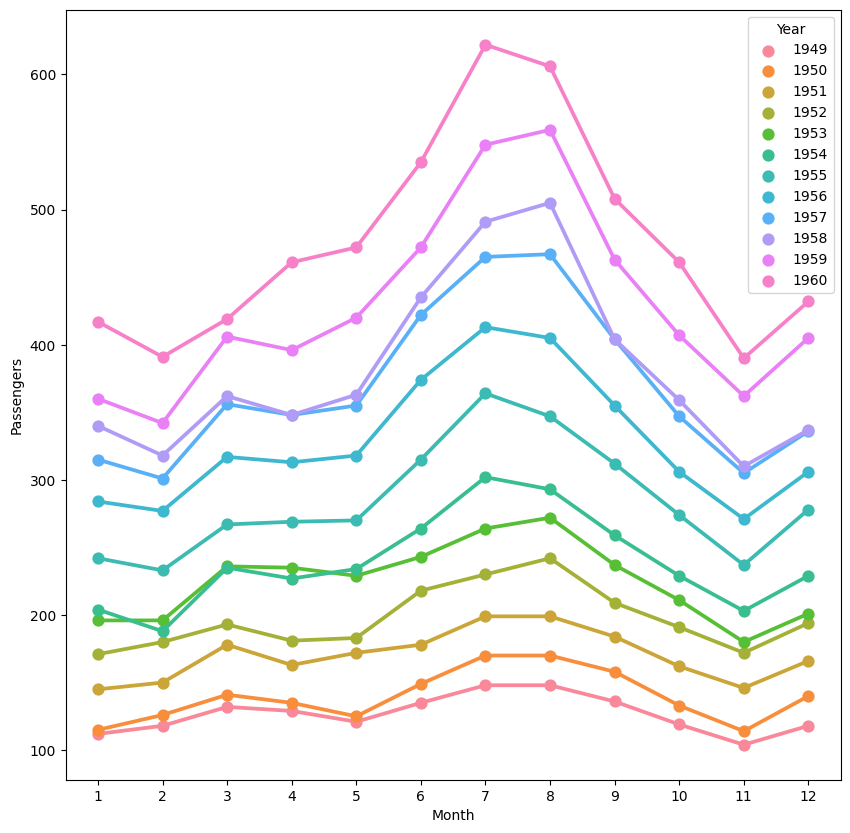

In [5]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
# Stacked line plot
plt.figure(figsize=(10,10))
sns.pointplot(x='Month',y='Passengers',hue='Year',data=df_temp)
plt.show()

Do gráfico acima, podemos dizer que todos os anos no mês de julho observamos o número máximo de passageiros e o número mínimo de passageiros da mesma forma no mês de novembro.

### Decomposição de Séries Temporais
Vamos agora usar a técnica de decomposição para desconstruir os dados da série temporal em vários componentes, como tendência e sazonalidade, para visualização das características da série temporal.

Aqui vamos usar o modelo 'aditivo' porque é rápido para desenvolver, rápido para treinar e fornecer padrões interpretáveis.

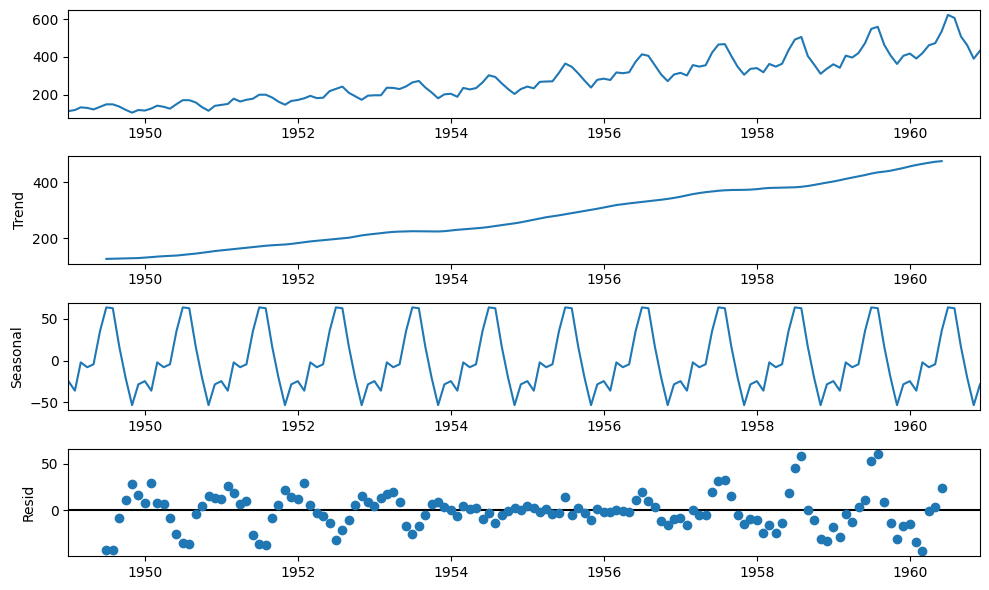

In [6]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive') 
fig = decomposition.plot()

## Análise de Séries Temporais <a id ="33"></a>
Portanto, nossa série temporal tem características de variação, tendência e sazonalidade. Durante nossa análise, vamos tentar várias técnicas para tornar as séries temporais estacionárias e registrar as pontuações de estacionariedade para cada método. Por fim, selecionaremos o método, que é fácil para a transformação inversa e fornece a melhor pontuação de estacionariedade.

### Verifique a estacionariedade
Vamos usar estatísticas rolantes e o teste de Dickey-Fuller para verificar a estacionaridade da série temporal

In [7]:
def stationarity_test(timeseries, window=12):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = window).mean()
    rolling_std = timeseries.rolling(window = window).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Ano')
    plt.ylabel('No de Passageiros')    
    plt.title('Teste de Estacionaridade: Média e STD Móvel')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Média Móvel')
    plt.plot(rolling_std, color= 'red', label= 'Std Móvel')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    dftest = adf(timeseries)
    ad = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (ad < critical_value):
        print(f'A série é estacionária. p-value={pvalue:.2f}')
    else:
        print(f'A série NÃO é estacionária. p-value={pvalue:.2f}')

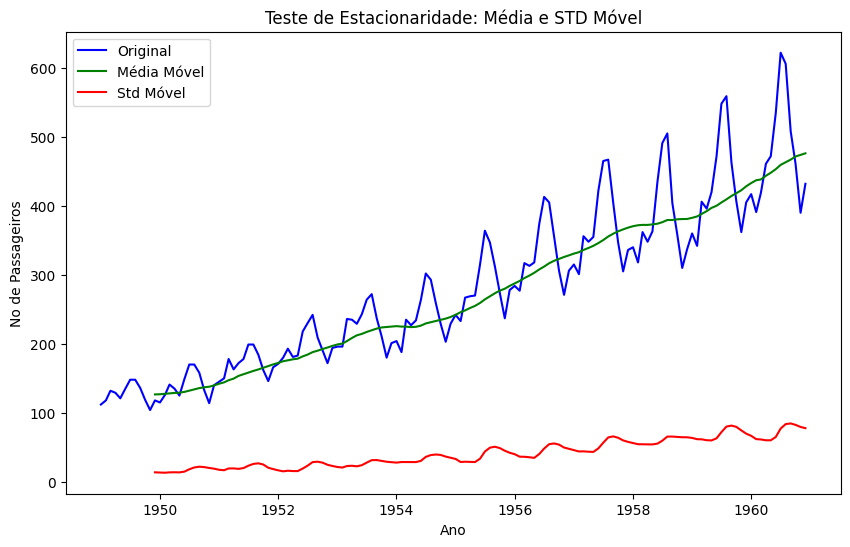

A série NÃO é estacionária. p-value=0.99


In [8]:
stationarity_test(df)

* Estatísticas contínuas: o desvio padrão tem muito menos variação, mas a média está aumentando continuamente.
* Teste Duckey Fuller: A estatística do teste é maior que o valor de 5%.

### Converter dados não estacionários em dados estacionários
Muitos modelos de previsão (e que vamos ver neste tutorial) tem como premissa que a série temporal deva ser estacionária. Para alcançar este objetivo, frequentimente aplicamos transformações na nossa série.
Vamos primeiro usar a técnica de diferenciação para obter a estacionariedade.

#### Diferenciação
Para transformar a série usando 'Diferenciação', usaremos o método diff() dos pandas. Um benefício de usar a função Pandas, além de exigir menos código, é que ela mantém as informações de data e hora das séries diferenciadas

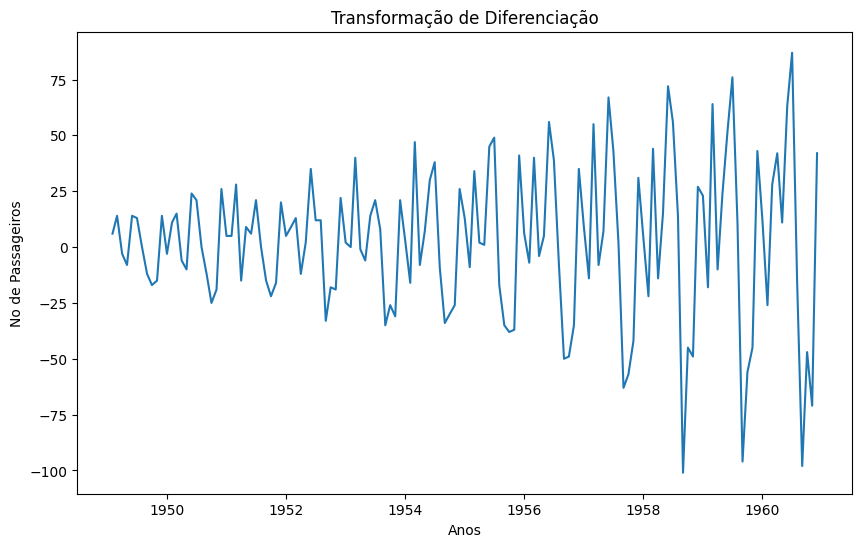

In [9]:
df_diff = df.diff(periods = 1) # diff de primeira ordem
plt.xlabel('Anos')
plt.ylabel('No de Passageiros')    
plt.title('Transformação de Diferenciação')
plt.plot(df_diff)
plt.show()

Então, no gráfico acima, fica claro que a técnica de diferenciação removeu a tendência da série temporal, mas a variância ainda está lá Agora vamos executar o stationarity_test() para verificar a eficácia da técnica de 'Diferenciação'

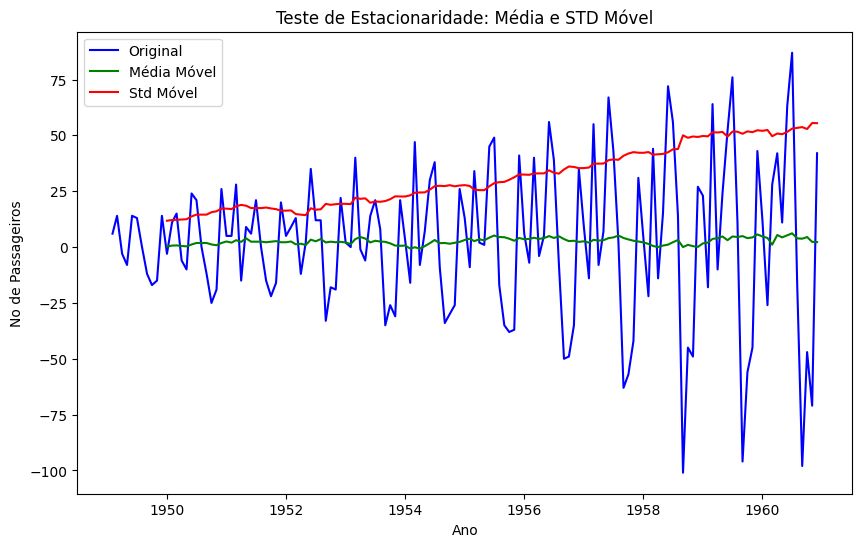

A série NÃO é estacionária. p-value=0.05


In [10]:
stationarity_test(df_diff.dropna())

Os valores móveis parecem estar variando ligeiramente e podemos ver que há uma ligeira tendência ascendente no desvio padrão. A estatística de teste bateu na trave mas podemos melhorar.

Observe que a variação na série também está afetando os resultados acima, que podem ser removidos usando outra técnica de transformação.



#### Transformação Logarítmica


Como a variância é proporcional aos níveis, vamos usar a transformação logarítmica.

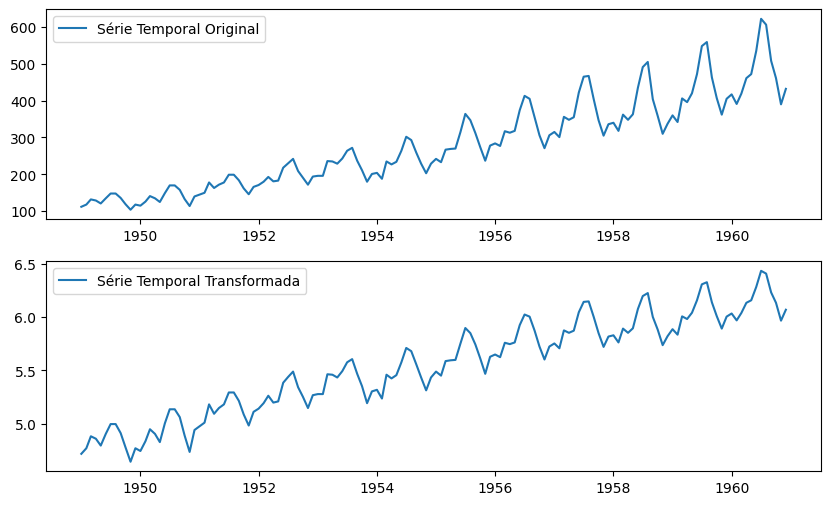

In [11]:
df_log = np.log(df)

plt.subplot(211)
plt.plot(df, label= 'Série Temporal Original')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Série Temporal Transformada')
plt.legend()  
plt.show()

Observe que, como estamos usando a transformação logarítmica, deveremos usar a função exponencial na série para recuperar a escala original.
```
     df = exp(df_log)
```

Vamos verificar novamente as pontuações do método diferencial com esses dados transformados em log.

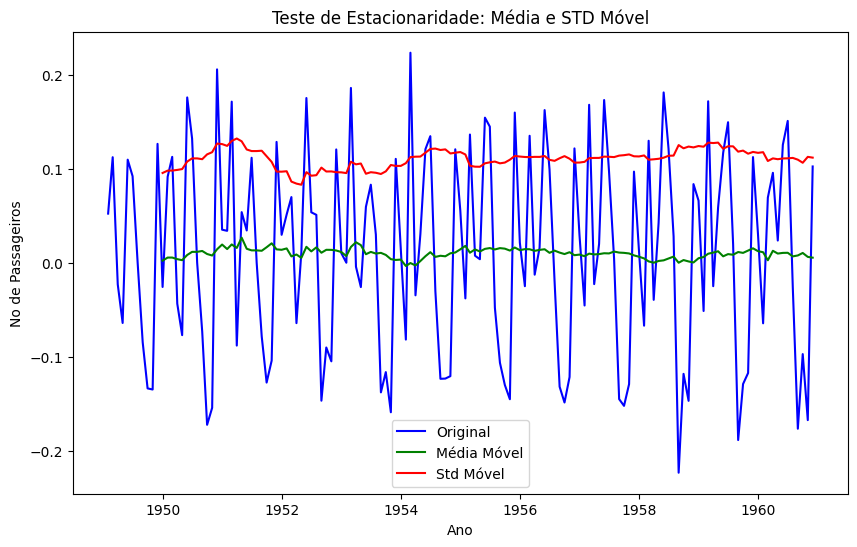

A série NÃO é estacionária. p-value=0.07


In [12]:
df_log_dif = df_log.diff(periods = 1) # diff de primeira ordem

df_log_dif.dropna(inplace = True)
stationarity_test(df_log_dif)

Resultado piorou?! Vamos diferenciar novamente.

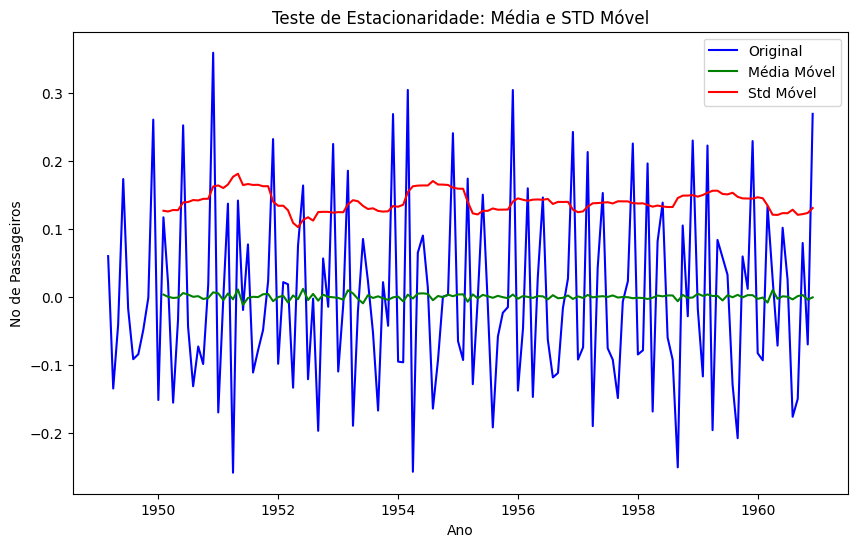

A série é estacionária. p-value=0.00


In [13]:
df_log_dif = df_log.diff(periods = 1) # diff de primeira ordem

df_log_dif.dropna(inplace = True)

df_log_ddif = df_log_dif.diff(periods=1).dropna() # diff de SEGUNDA ordem
stationarity_test(df_log_ddif)

Pronto, nossa série temporal agora é estacionária.

## Previsão <a id ="34"></a>
* Te ajuda a $\textcolor{green}{\text{planejar}}$ o futuro.
* Te ajuda a $\textcolor{green}{\text{decidir}}$ onde investir o seu dinheiro.
* Te ajuda a $\textcolor{green}{\text{antecipar}}$ mudanças no mercado.

### Modelos para Previsão

#### Modelos Autorregressivos - AR
Tomam como base a intuição de que o passado prediz o futuro. Desse modo, ele pressupõe um processo de série temporal no qual o valor em um ponto no tempo _t_ é uma função dos valores da série pontos anteriore no ponto.

Ex: AR(2) $\longrightarrow$
$y_t = b_0 + b_1\times y_{t-1} + b_2\times y_{t-2} + \epsilon$    

Aqui, o 2 é a ordem do modelo (número de atrasos) e este valor é ajustado através do parâmetro $p$.


#### Modelos de Média Móvel - MA
Um modelo de média móvel pode ser expresso de forma semelhante a um modelo AR, exceto que os termos incluídos na equação se referem a termos de erro presentes e passados. 

Ex: MA(2) $\longrightarrow$
$y_t = \mu + w_t + \theta_1 \times w_{t-1} + \theta_2 \times w_{t-2}$

Nesse modelo, o 2 também é a ordem do modelo e este valor é ajustado através do parâmetro $q$.


#### Modelos Autorregressivos Integrados de Média Móvel - ARIMA
Uma combinação dos modelos acima, ou seja, reconhece que a série temporal pode ter a dinâmica AR e MA além de um fator adicional, a *diferenciação*, uma forma de remover tendências e tornar uma série temporal estacionária.

Ex: ARIMA($p$, $d$, $q$) $\longrightarrow$
$y_t = \textcolor{red}{b_0 + b_1\times \hat{y}_{t-1} + ...+ b_{p}\times \hat{y}_{t-p}} + \textcolor{blue}{\theta_1 \times w_{t-1} +...+ \theta{q} \times w_{t-q}}$

Nesse modelo temos três parâmetros:
* $p$ (do AR)  é a ordem do modelo autoregressivo;
* $d$ (para diferenciação) é o grau de diferenciação e
* $q$ (do MA) é a ordem do modelo de média móvel.

### Darts <a id ="10"></a>
Gostou do scikit-learn? O Darts tem como objetivo trazer simplicidade no processo de análise e predição de séries temporais, como um scikit-learn para séries temporais, e seu objetivo principal é simplificar toda a experiência de aprendizado de máquina de séries temporais.

Para instalá-la só é preciso do comando:
```
     pip install darts
```

![Time_Series_Characteristics](https://unit8.com/wp-content/uploads/2021/07/1_yaHh5V0AgxEYxJYrv9VQmA.png)

Você pode olhar a documentação do Darts [aqui](https://unit8co.github.io/darts/index.html)

In [14]:
from darts import TimeSeries

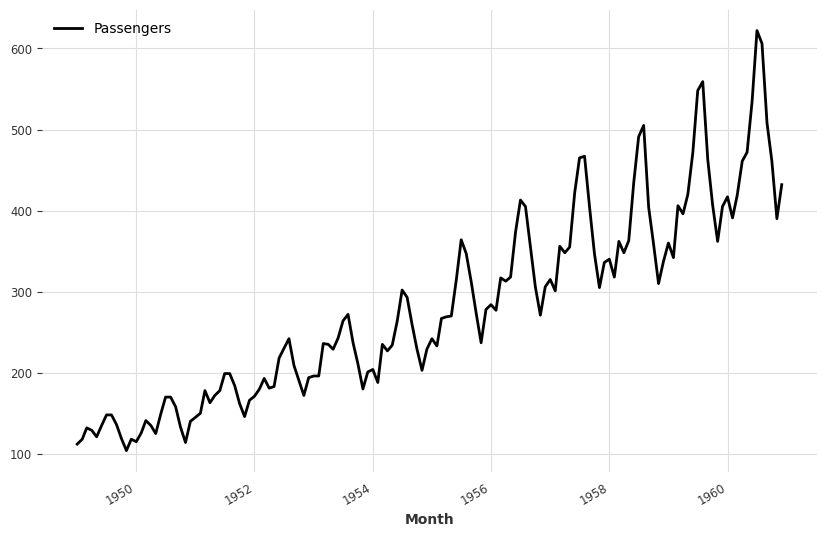

In [15]:
series = TimeSeries.from_dataframe(df, value_cols="Passengers")

series.plot()

In [16]:
# Divisão Treino-Teste

year = pd.Timestamp("19570501")
train, test = series.split_before(year)

# train, test = series.split_before(101)
# train, test = series.split_before(.8)

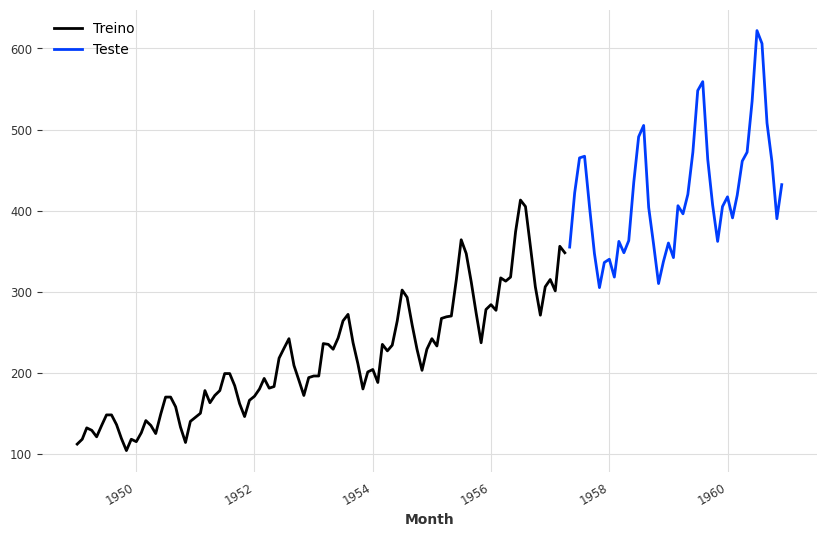

In [17]:
train.plot(label="Treino")
test.plot(label="Teste")
plt.show()

In [18]:
# Aplicando transformação logarítmica
train_log = train.map(np.log)

### Arima

<p align="center">
  <img src="http://www.seanabu.com/img/flowchart.png" />
</p>

In [19]:
from darts.utils.statistics import plot_pacf, plot_acf

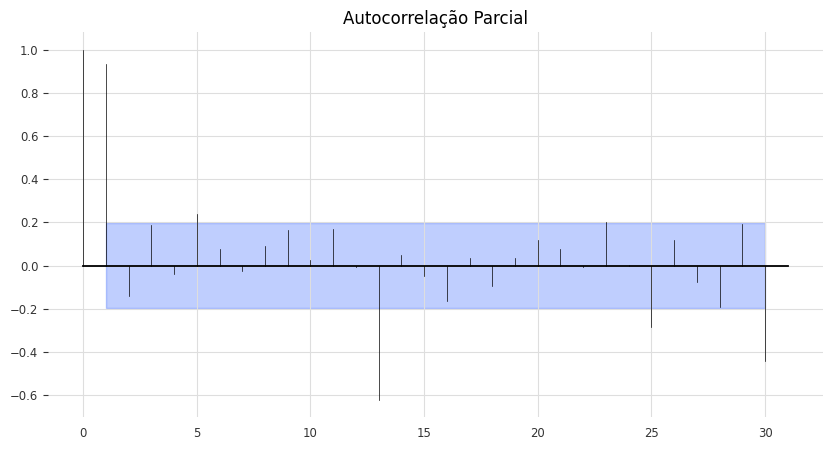

In [20]:
# Determinando o valor de p
plot_pacf(train_log, max_lag=30)
plt.title("Autocorrelação Parcial")
plt.show()

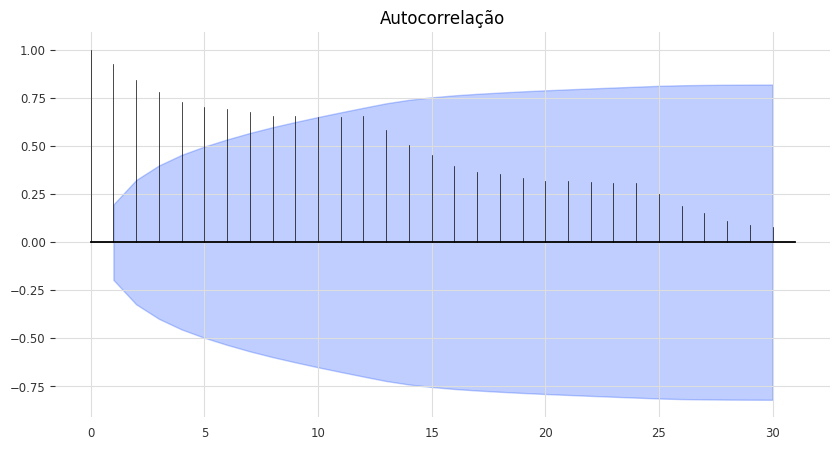

In [21]:
# Determinando o valor de q
plot_acf(train_log, max_lag=30)
plt.title("Autocorrelação")
plt.show()

In [22]:
# instanciando o modelo
from darts.models import ARIMA

arima = ARIMA(p=1, d=2, q=9)

In [23]:
# fitting
arima.fit(train_log);

In [24]:
# predição
predicted_log = arima.predict(len(test))
predicted = predicted_log.map(np.exp)

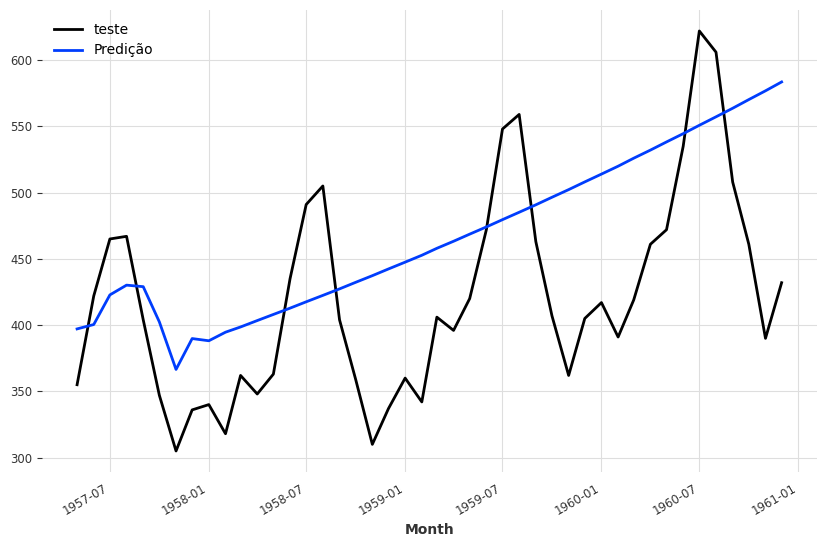

In [25]:
test.plot(label="teste")
predicted.plot(label="Predição")

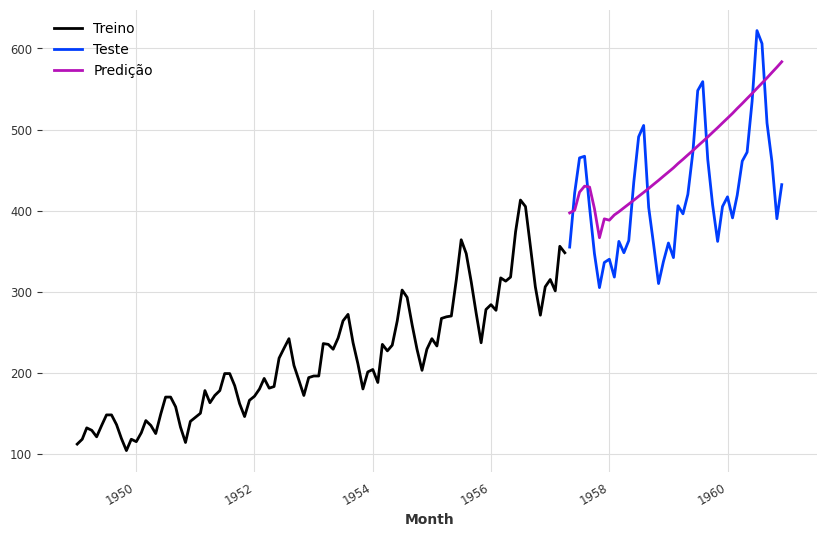

In [26]:
train.plot(label="Treino")
test.plot(label="Teste")
predicted.plot(label="Predição")

#### Métricas de Validação

In [27]:
from darts.metrics import mape, mae, mse, rmse
from tabulate import tabulate

In [28]:
print(tabulate([['Erro médio Absoluto percentual - MAPE:', mape(test, predicted)], 
                ['Erro médio absoluto - MAE:', mae(test, predicted)],
                ['Erro médio quadrático - MSE:', mse(test, predicted)],
                ['Raiz do erro médio quadrático - RMSE:', rmse(test, predicted)]],     
               headers=['Métrica do Modelo', 'Valor'], floatfmt=".2f"))

Métrica do Modelo                         Valor
--------------------------------------  -------
Erro médio Absoluto percentual - MAPE:    17.51
Erro médio absoluto - MAE:                70.04
Erro médio quadrático - MSE:            6417.56
Raiz do erro médio quadrático - RMSE:     80.11


### Adicionando Sazonalidade - SARIMA
Como 'p' é um parâmetro do modelo AR, manteremos seu valor como '0'.

In [29]:
from darts.utils.statistics import check_seasonality

In [30]:
for m in range(2, 25):
    is_seasonal, mseas = check_seasonality(train_log, m=m)
    if is_seasonal:
        break

if is_seasonal:
    print('Existe sazonalidade de ordem {}.'.format(mseas))

Existe sazonalidade de ordem 12.


<StemContainer object of 3 artists>

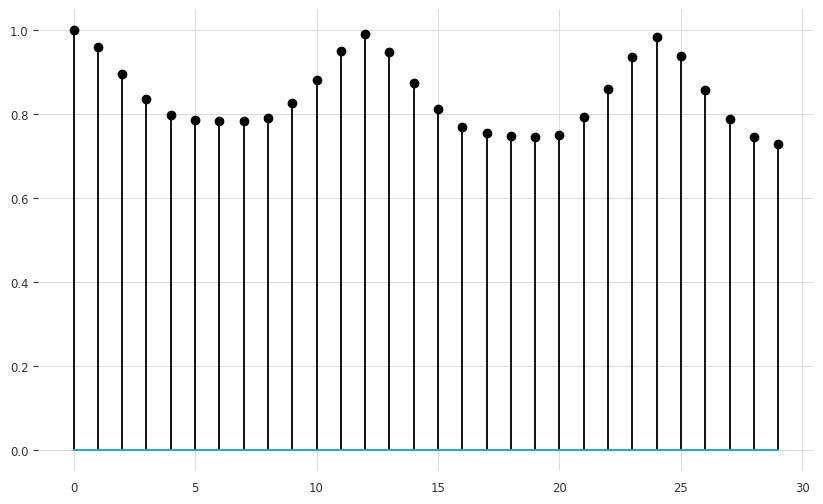

In [54]:
auto_corr = [df.Passengers.autocorr(lag=i) for i in range(30)]

plt.stem(auto_corr)

In [31]:
# instanciando o modelo
sarima = ARIMA(p=1, d=2, q=9, seasonal_order=(1,1,1,12))

In [32]:
# fitting
sarima.fit(train_log);

In [33]:
# predição
predicted2_log = sarima.predict(len(test))
predicted2 = predicted2_log.map(np.exp)

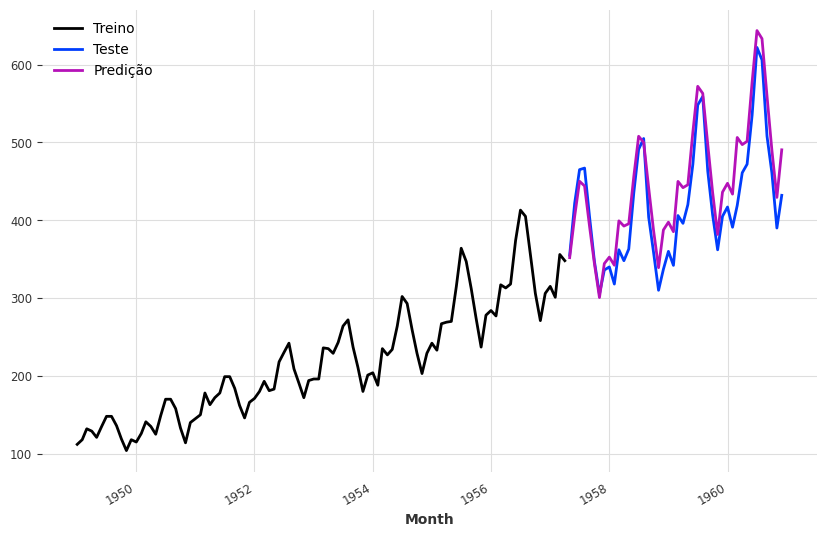

In [34]:
train.plot(label="Treino")
test.plot(label="Teste")
predicted2.plot(label="Predição")

In [35]:
print(tabulate([['Erro médio Absoluto percentual :', mape(predicted2, test)], 
                ['Erro médio absoluto :', mae(predicted2, test)],
                ['Erro médio quadrático :', mse(predicted2, test)],
                ['Raiz do erro médio quadrático :', rmse(predicted2, test)]],     
               headers=['Métrica do modelo', 'Valor'], floatfmt=".2f"))

Métrica do modelo                   Valor
--------------------------------  -------
Erro médio Absoluto percentual :     6.61
Erro médio absoluto :               29.55
Erro médio quadrático :           1147.54
Raiz do erro médio quadrático :     33.88


### Automatizando - AutoARIMA

In [36]:
from darts.models import AutoARIMA

In [37]:
# set up the ARIMA forecaster
auto_arima = AutoARIMA(
    start_p=1, d=1, start_q=1,
    max_p=4, max_d=3, max_q=4,
    start_P=0, D=0, start_Q=0, m=max(4,mseas), seasonal=True,
    max_P=4, max_D=3, max_Q=4,
    stationary=False, 
    information_criterion="aic", alpha=0.5, 
    stepwise=True, 
    suppress_warnings=True, error_action="trace", trace=True, with_intercept="auto")

In [38]:
auto_arima.fit(train_log)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-169.537, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-165.683, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-224.030, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-166.459, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-166.640, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-324.801, Time=0.34 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-302.500, Time=0.18 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-321.834, Time=0.61 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-322.867, Time=0.65 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-248.241, Time=0.31 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-318.611, Time=0.49 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=-320.856, Time=0.81 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-318.270, Time=0.15 sec
 ARIMA(1,1,1)(1,0,1)[12]

In [39]:
predicted4 = auto_arima.predict(len(test))
# predição
predicted4_log = auto_arima.predict(len(test))
predicted4 = predicted4_log.map(np.exp)

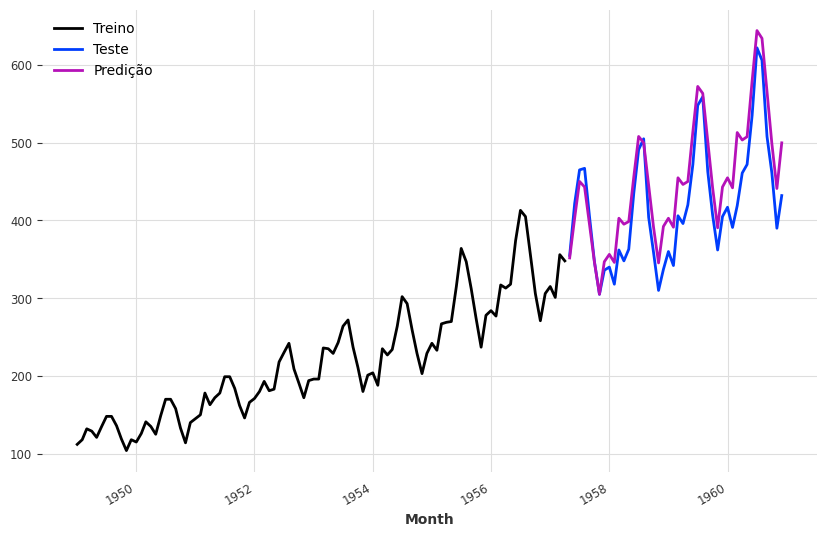

In [40]:
train.plot(label="Treino")
test.plot(label="Teste")
predicted4.plot(label="Predição")

In [41]:
print(tabulate([['Erro médio Absoluto percentual :', mape(predicted4, test)], 
                ['Erro médio absoluto :', mae(predicted4, test)],
                ['Erro médio quadrático :', mse(predicted4, test)],
                ['Raiz do erro médio quadrático :', rmse(predicted4, test)]],     
               headers=['Métrica do modelo', 'Valor'], floatfmt=".2f"))

Métrica do modelo                   Valor
--------------------------------  -------
Erro médio Absoluto percentual :     7.35
Erro médio absoluto :               33.20
Erro médio quadrático :           1455.62
Raiz do erro médio quadrático :     38.15


## Vantagens e Desvantagens dos Modelos Estatísticos



- Vantagens 
    - Explicabilidade, desse modo seus parâmetros podem ser entedidos com clareza.
    - É possível derivar com mais clareza e rigor estatístico.
    - Aplicabilidade em conjunto de dados pequenos.
    - Suas variações e modificaçoes tem ganhos significativos de perfomance e resistentes a overffiting.
    - Boas técnicas para seleção de modelos.   

- Desvantagens
    - Desempenho nem sempre melhora com maiores conjunto de dados.
    - Falha ao representar relações não-lineares.